<a href="https://colab.research.google.com/github/tahreemrasul/gemma3_inference/blob/main/Inference_images_and_videos_with_Gemma3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemma 3: multimodal & multilingual capabilities

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/tahreemrasul/gemma3_inference/blob/main/Inference_images_and_videos_with_Gemma3.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/tahreemrasul/gemma3_inference/blob/main/Inference_images_and_videos_with_Gemma3.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

| | |
|-|-|
| Author(s) |  [Tahreem Rasul](https://github.com/tahreemrasul)

### Get access to Gemma 3

Before using Gemma 3 for the first time, you must request access to the model through Hugging Face by completing the following steps:

1. Log in to [Hugging Face](https://huggingface.co), or create a new Hugging Face account if you don't already have one.
2. Go to the [Gemma 3 model card](https://huggingface.co/google/gemma-3-4b-it) to get access to the model.
3. Complete the consent form and accept the terms and conditions.

To generate a Hugging Face token, open your [**Settings** page in Hugging Face](https://huggingface.co/settings), choose **Access Tokens** option in the left pane and click **New token**. In the next window that appears, give a name to your token and choose the type as **Write** to get the write access.

Then, in Colab, select **Secrets** (🔑) in the left pane and add your Hugging Face token. Store your Hugging Face token under the name `HF_TOKEN`.

### Select the runtime

To complete this tutorial, you'll need to have a Colab runtime with sufficient resources to load the Gemma 3 model. In this case, a T4/L4 GPU would be needed to load the model weights.

1. In the upper-right of the Colab window, click the **▾ (Additional connection options)** dropdown menu.
1. Select **Change runtime type**.
1. Under **Hardware accelerator**, select **T4 or L4**.

## Step 1: Install Transformers

In [ ]:
!pip install git+https://github.com/huggingface/transformers@v4.49.0-Gemma-3

  Cloning https://github.com/huggingface/transformers (to revision v4.49.0-Gemma-3) to /tmp/pip-req-build-0piwacb1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-0piwacb1
  Running command git checkout -q 367bab469b0ef32017e2a0a0a5dbac5d36002f03
  Resolved https://github.com/huggingface/transformers to commit 367bab469b0ef32017e2a0a0a5dbac5d36002f03
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.50.0.dev0-py3-none-any.whl size=10936468 sha256=63473068d080a2241937eb09d3144b44fac7e7bf7bff3b29eef6a6c14de1f9ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-fofrpzpd/wheels/53/15/d5/d63b866c641d8863f9cd29a4cc7a5efc38476c3aae8247c195
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transf

## Step 2: Import libraries and dependencies


In [ ]:
from transformers import AutoProcessor, Gemma3ForConditionalGeneration
from PIL import Image
import cv2
from IPython.display import Markdown, HTML
from base64 import b64encode
import requests
import torch

## Step 3: Choose the Gemma 3 model variant.

Gemma 3 is available in four sizes, each supporting different features:

* `gemma-3-1b-it`
  * Supports only text input and English language
  * 32k context length

* `gemma-3-4b-it`, `gemma-3-12b-it`, `gemma-3-27b-it`
  * Supports both text and image input
  * Supports 140+ languages
  * 128k context length


In the following code block, we are initializing a pretrained Gemma3 model using the HuggingFace library.

We first specify the `model_id`.

**`Gemma3ForConditionalGeneration`** is a subclass of **`PreTrainedModel`** from the Hugging Face Transformers library, designed for text generation tasks (like chat, summarization, instruction following) using the Gemma 3 model. We will be using the **`from_pretrained()`** method from this class to download and initialize the model.

*   **`device_map="auto"`** automatically places the model on the best available device (like a GPU if one is available).
*   **`torch_dtype=torch.bfloat16`** sets the precision. `bfloat16` uses less memory and works well on newer GPUs.
*   **`.eval()`** puts the model in inference mode (not training), which is important when you're just generating text.

The final step is loading the processor, which helps us prepare inputs and decode outputs for the model. It handles:

*   Tokenizing text (turning words into numbers the model understands)
*   Decoding model outputs back into human-readable text

In [ ]:
model_name = 'gemma-3-4b-it' # @param ['gemma-3-1b-it', 'gemma-3-4b-it', 'gemma-3-12b-it', 'gemma-3-27b-it']
model_id = f"google/{model_name}"

model = Gemma3ForConditionalGeneration.from_pretrained(
    model_id, device_map="auto", torch_dtype=torch.bfloat16,
).eval()

processor = AutoProcessor.from_pretrained(model_id)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

## Step 4: Define helper functions
To work with images and videos in our vision-language tasks, we define a few utility functions to handle preprocessing and visualization:

**`resize_image(image_path)`**

Loads an image from the given path and resizes it to a 640x640 box while maintaining the original aspect ratio. This makes sure images are not distorted and fit within the model’s expected input size.

**`get_model_response(img, prompt, model, processor)`**
This function sends a prompt + image pair to the model and returns the generated response.
It:

*   Wraps the image and text in a "chat-like" message structure
*   Uses the processor to tokenize and format inputs
*   Calls the model to generate a response
*   Decodes the result into readable text

Note: It uses **`torch.inference_mode()`** for efficiency since we're not training.

**`extract_frames(video_path, num_frames)`**
Extracts a set number of evenly spaced frames from a video along with timestamps.

**`show_video(video_path)`**
Displays the selected video inline using HTML5, helpful for reviewing which video was processed.

In [ ]:
def resize_image(image_path):
    img = Image.open(image_path)

    target_width, target_height = 640, 640
    # Calculate the target size (maximum width and height).
    if target_width and target_height:
        max_size = (target_width, target_height)
    elif target_width:
        max_size = (target_width, img.height)
    elif target_height:
        max_size = (img.width, target_height)

    img.thumbnail(max_size)

    return img


def get_model_response(img: Image, prompt: str, model, processor):
    # Prepare the messages for the model.
    messages = [
        {
            "role": "system",
            "content": [{"type": "text", "text": "You are a helpful assistant. Reply only with the answer to the question asked, and avoid using additional text in your response like 'here's the answer'."}]
        },
        {
            "role": "user",
            "content": [
                {"type": "image", "image": img},
                {"type": "text", "text": prompt}
            ]
        }
    ]

    # Tokenize inputs and prepare for the model.
    inputs = processor.apply_chat_template(
        messages, add_generation_prompt=True, tokenize=True,
        return_dict=True, return_tensors="pt"
    ).to(model.device, dtype=torch.bfloat16)

    input_len = inputs["input_ids"].shape[-1]

    # Generate response from the model.
    with torch.inference_mode():
        generation = model.generate(**inputs, max_new_tokens=100, do_sample=False)
        generation = generation[0][input_len:]

    # Decode the response.
    response = processor.decode(generation, skip_special_tokens=True)
    return response


def extract_frames(video_path, num_frames):
    """
    The function is adapted from:
    https://github.com/merveenoyan/smol-vision/blob/main/Gemma_3_for_Video_Understanding.ipynb
    """
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return []

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Calculate the step size to evenly distribute frames across the video.
    step = total_frames // num_frames
    frames = []

    for i in range(num_frames):
        frame_idx = i * step
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            break
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        timestamp = round(frame_idx / fps, 2)
        frames.append((img, timestamp))

    cap.release()
    return frames


def show_video(video_path, video_width = 600):
  video_file = open(video_path, "r+b").read()
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  video_html = f"""<video width={video_width} controls><source src="{video_url}"></video>"""
  return HTML(video_html)

## Step 5: Inference on images
We will fetch and download some sample images from github for inferencing. Feel free to upload your own in the temporary Colab storage ('/content/') -> 📁 icon in left sidebar.

In [ ]:
!wget https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/image_1.png -O /content/image_1.png
!wget https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/image_2.png -O /content/image_2.png
!wget https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/image_3.png -O /content/image_3.png
!wget https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/image_4.png -O /content/image_4.png

--2025-04-18 11:38:33--  https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/image_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12390223 (12M) [application/octet-stream]
Saving to: ‘/content/image_1.png’

/content/image_1.pn 100%[===================>]  11.82M  --.-KB/s    in 0.06s   

2025-04-18 11:38:33 (187 MB/s) - ‘/content/image_1.png’ saved [12390223/12390223]

--2025-04-18 11:38:33--  https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/image_2.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

#### Example 1: Describe an image

In the first experiment, we will simply pass the image alongwith a prompt and ask the model to describe what it sees in the image. Feel free to play around with this and see what you get back from the model.

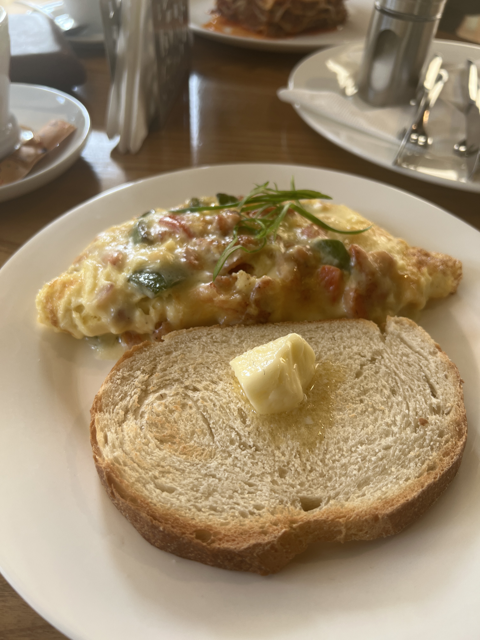

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `64` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


An omelet with ham, peppers, and cheese, served with a slice of bread topped with butter and green onions.

In [ ]:
image_file = 'image_1.png' # @param {type: 'string'}
prompt = "Describe the image." # @param {type: 'string'}


img = resize_image(image_file)
display(img)
response = get_model_response(img, prompt, model, processor)
display(Markdown(response))

#### Example 2: Identify landmark

In the second experiment, we are going to be a bit more detailed. We will pass it the image alongwith a prompt to identify the landmark in the image.

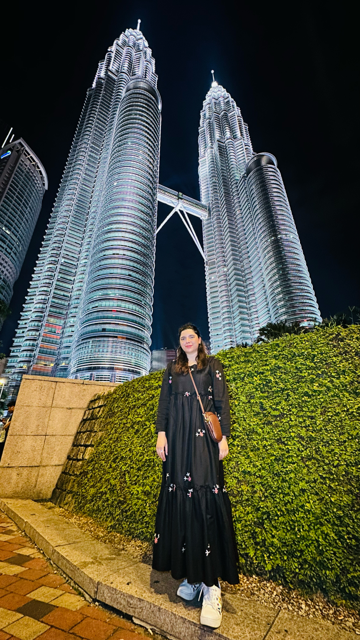

Petronas Twin Towers, Kuala Lumpur, Malaysia

In [ ]:
image_file = 'image_2.png' # @param {type: 'string'}
prompt = "Identify the famous landmark and location." # @param {type: 'string'}


img = resize_image(image_file)
display(img)
response = get_model_response(img, prompt, model, processor)
display(Markdown(response))

#### Example 3: Multilingual prompt

> The prompt is in Roman Urdu language which translates to: "What's present in this image?"

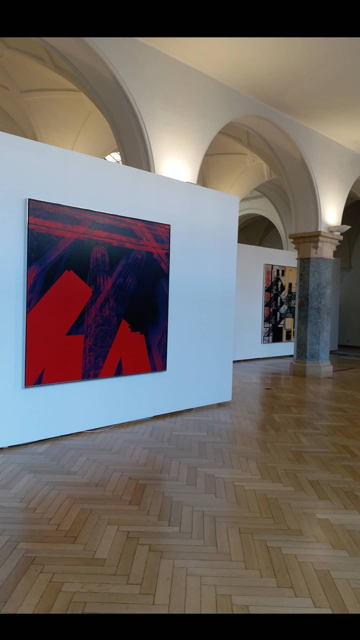

ایک گیلری میں فن پارہ

In [ ]:
image_file = 'image_3.png' # @param {type: 'string'}
prompt = " اس تصویر میں  کیا ہے" # @param {type: 'string'}


img = resize_image(image_file)
display(img)
response = get_model_response(img, prompt, model, processor)
display(Markdown(response))

> As you can see, it gave the response in the same language (Urdu here), in which it was prompted. ایک گیلری میں فن پارہ which translates to piece of art in a gallery.

#### Example 4: Mathematical Reasoning

Our fourth experiment will be around sharing an image containing a mathematical equation. We will pass this image alongwith a prompt, and ask the model to find the value of the unknown.

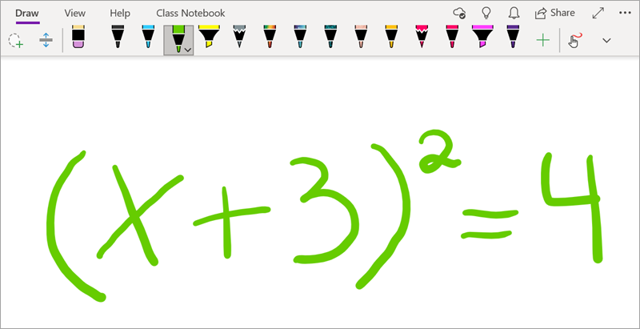

x = 1

In [ ]:
from PIL import Image
from IPython.display import Markdown

image_file = 'image_4.png' # @param {type: 'string'}
prompt = "What is the value of x?" # @param {type: 'string'}


img = resize_image(image_file)
display(img)
response = get_model_response(img, prompt, model, processor)
display(Markdown(response))

## Step 6: Inference on videos

Download a sample video.

The video is a clip from the movie "The Godfather".
* Credits: Paramount Movies
* Source: [YouTube](https://www.youtube.com/watch?v=eZHsmb4ezEk)

In [ ]:
!wget https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/video.mp4 -O /content/video.mp4
!mkdir -p /content/frames

--2025-04-18 11:47:55--  https://raw.githubusercontent.com/tahreemrasul/gemma3_inference/main/assets/video.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87026315 (83M) [application/octet-stream]
Saving to: ‘/content/video.mp4’

/content/video.mp4  100%[===================>]  82.99M   380MB/s    in 0.2s    

2025-04-18 11:47:57 (380 MB/s) - ‘/content/video.mp4’ saved [87026315/87026315]



In [ ]:
# Video file.
video_path = "video.mp4" # @param {type : 'string'}

# No. of frames to be extracted from the video.
num_frames = 2 # @param {type : 'integer'}

In [ ]:
video_output = show_video(video_path, video_width=800)
display(video_output)

Buffered data was truncated after reaching the output size limit.

In this step, we:

*   Extract a few key frames from the video using our extract_frames function
*   Construct a multi-turn chat prompt that includes both text and images for the model

For each extracted frame:

*   We add a timestamp so the model knows when the frame appears
*   We save the frame locally and add it to the prompt as an image reference


💡 This creates a multi-modal prompt that tells the model:
> Here's a series of frames from a video, please summarize what's happening.”



In [ ]:
video_frames = extract_frames(video_path, num_frames=num_frames)

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": "You are a helpful assistant."}]
    },
    {
        "role": "user",
        "content": [{"type": "text", "text": "Please summarize what is happening in this video."}]
    }
]


# Add frames to the messages structure.
for frame_data in video_frames:
    img, timestamp = frame_data
    messages[1]["content"].append({"type": "text", "text": f"Frame at {timestamp} seconds:"})
    img.save(f"/content/frames/frame_{timestamp}.png")
    messages[1]["content"].append({"type": "image", "url": f"/content/frames/frame_{timestamp}.png"})

messages

[{'role': 'system',
  'content': [{'type': 'text', 'text': 'You are a helpful assistant.'}]},
 {'role': 'user',
  'content': [{'type': 'text',
    'text': 'Please summarize what is happening in this video.'},
   {'type': 'text', 'text': 'Frame at 0.0 seconds:'},
   {'type': 'image', 'url': '/content/frames/frame_0.0.png'},
   {'type': 'text', 'text': 'Frame at 42.21 seconds:'},
   {'type': 'image', 'url': '/content/frames/frame_42.21.png'}]}]

Now that we've prepared our prompt with images and text, we pass it to the model for generation.

Here's what we are doing:

*   **`apply_chat_template(...)`** formats and tokenizes the messages into a format the model understands.
*   We move the input to the correct device (like a GPU) using **`.to(model.device)`**.
*   We generate a response using the model with** `.generate(...)`**. We set **`max_new_tokens=500`** to limit the length of the output and **`do_sample=False`** to make it deterministic (same input = same output).

In [ ]:
import torch
torch.cuda.empty_cache()

You might run into OutOfMemory Cuda issues by executing the cell below. For this reason, we have cleared cache above. You can decrease the number of frames and see if that works.

In [ ]:
inputs = processor.apply_chat_template(
    messages, add_generation_prompt=True, tokenize=True,
    return_dict=True, return_tensors="pt"
).to(model.device)


input_length = inputs["input_ids"].shape[-1]

# Generate a response based on the inputs.
output = model.generate(**inputs, max_new_tokens=100, do_sample=False)
output = output[0][input_length:]
response = processor.decode(output, skip_special_tokens=True)

display(Markdown(response))

Okay, let's break down what's happening in these two frames from *The Godfather*.

**Frame 0.0 seconds:**

In this frame, we see Don Vito Corleone (Marlon Brando) seated at his large, imposing desk. He's in a dark suit, with a red rose pinned to his lapel. He appears to be in a serious, contemplative mood, likely engaged in a conversation or considering a matter of importance. The room is

Congratulations on successfully completing this tutorial.